In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("addition_dataset.csv")

In [3]:
data

,x,y,sum
0,40,80,120
1,99,44,143
2,25,49,74
3,56,33,89
4,51,99,150
...,...,...,...
995,54,33,87
996,83,88,171
997,78,4,82
998,19,27,46


In [4]:
import matplotlib.pyplot as plt

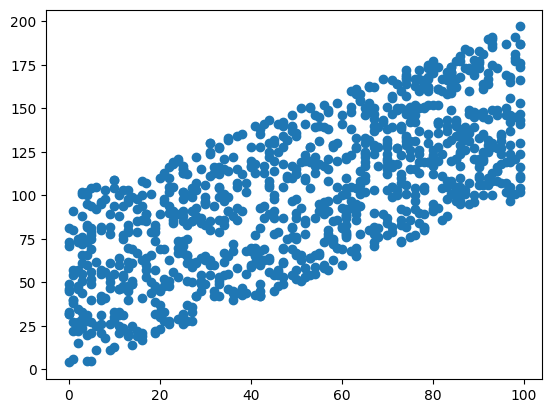

In [5]:
plt.scatter(data["x"],data["sum"])

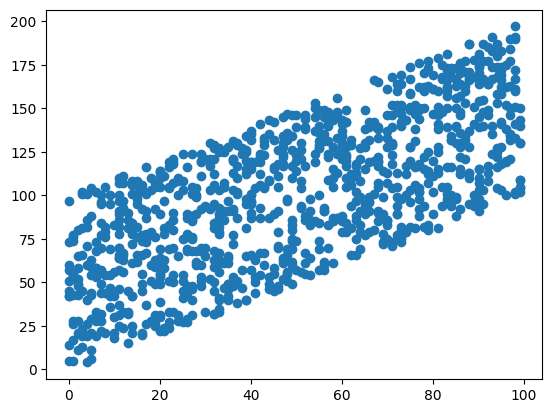

In [6]:
plt.scatter(data["y"], data["sum"])

1. Store Feature Matrix in X and response(target) in Vector y

In [7]:
X = data[["x","y"]]  #independent variables
y = data["sum"]  #dependent variable

2. Train/Test data split
   1. Split data into two part : a training set and a testing set
   2. Train the model on training set
   3. Test the model on testing set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20, random_state = 42)
X_train
# X_train and y_train - Both are used to train the model
# X_test - It is used to test the model
# y_test - It is used to compare the results

,x,y
29,73,87
535,25,88
695,59,27
557,67,95
836,27,58
...,...,...
106,86,24
270,44,62
860,61,49
435,88,7


3. Import and train the model (I am using linear regression)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train.values,y_train.values)  #fit is used to train the model

LinearRegression()

4. Check model's prediction performance

In [12]:
model.score(X_train.values,y_train.values)

1.0

In [13]:
model.score(X_test.values,y_test.values)

1.0

5. Comparing the results

In [14]:
y_predicted = model.predict(X_test.values)
y_predicted

array([ 51., 101., 130.,  67., 128.,  79., 177., 107.,  27.,  62.,  85.,
        98., 141., 128., 123.,  58., 129., 111., 114., 113., 119.,  43.,
        55.,  48., 105.,  57., 132.,  60., 174.,  88.,  83., 134.,  71.,
       140., 153., 130., 170., 101., 107.,  83.,  56.,  42.,  91.,  86.,
       108., 145., 173., 122.,  47., 107., 127.,  21.,  53.,  63., 149.,
        94., 149., 134.,  22.,  51.,  49., 177.,  68., 119., 103., 101.,
       160.,  69.,  63.,  49.,  70., 120.,  64.,  91.,  64., 134., 122.,
        61.,  70., 114.,  78., 104., 120.,  78.,   4., 147.,  46., 146.,
       150.,  49.,  11., 110.,  66., 132.,  96., 142., 144., 146.,  68.,
        66., 133.,  75., 151.,  75.,  44., 103.,  71.,  26., 140., 190.,
        42.,  97.,  60., 110., 105., 138.,  61.,  93.,  82., 132.,  22.,
        82.,  67., 138.,  80.,  41., 100.,  69.,  99.,  60.,  91.,  45.,
       120.,  87., 149.,  97., 104., 111.,  95., 164., 139., 131.,  86.,
       128., 150., 171.,  96.,  56., 156.,  43.,  5

In [15]:
y_test

521     51
737    101
740    130
660     67
411    128
      ... 
408    146
332    100
208     91
613    122
78     105
Name: sum, Length: 200, dtype: int64

In [16]:
df = pd.DataFrame({"Actual":y_test,"Predicted":y_predicted})

In [17]:
df

,Actual,Predicted
521,51,51.0
737,101,101.0
740,130,130.0
660,67,67.0
411,128,128.0
...,...,...
408,146,146.0
332,100,100.0
208,91,91.0
613,122,122.0


6. Prediction

In [18]:
model.predict([[100.2,20.3]])

array([120.5])

7. Save model using joblib

In [19]:
import joblib
joblib.dump(model,"Add_model")

['Add_model']

In [20]:
model = joblib.load("Add_model")

In [21]:
model.predict([[20,300]])

array([320.])

GUI

In [22]:
import joblib
from customtkinter import *
from tkinter import PhotoImage, messagebox

set_appearance_mode("dark")
set_default_color_theme("dark-blue")

def model_prediction():
    try:
        val1 = float(num1.get())
        val2 = float(num2.get())

        model = joblib.load("Add_model")
        result = str(model.predict([[val1, val2]]))
        
        remove = ["[","]"]
        for substring in remove:
            result = result.replace(substring,"")

        result_label.configure(text=f"Result: {result}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter valid numbers.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def clear_fields():
    num1.delete(0, END)
    num2.delete(0, END)
    result_label.configure(text="Result")

root = CTk()
root.geometry("500x400")
root.title("Add_Model")

# Icon
root.iconbitmap("addition_image.ico")

# Title Label
title_label = CTkLabel(root, text="Adding Two Numbers using Machine Learning", font=("Arial", 20, "bold"))
title_label.pack(padx=20, pady=20)

# Entry for first number
num1 = CTkEntry(root, placeholder_text="Enter first number", width=200, height=30, font=("Arial", 14))
num1.pack(padx=20, pady=10)

# Entry for second number
num2 = CTkEntry(root, placeholder_text="Enter second number", width=200, height=30, font=("Arial", 14))
num2.pack(padx=20, pady=10)

# Predict Button
predict_button = CTkButton(root, text="Predict", command=model_prediction, width=150, height=40, font=("Arial", 14, "bold"))
predict_button.pack(padx=20, pady=10)

# Clear Button
clear_button = CTkButton(root, text="Clear", command=clear_fields, width=150, height=40, font=("Arial", 14, "bold"))
clear_button.pack(padx=20, pady=10)

# Frame for Result
f1 = CTkFrame(root)
f1.pack(pady=20, padx=20)
result_label = CTkLabel(f1, text="Result", font=("Arial", 18))
result_label.pack(padx=80, pady=20)

root.mainloop()
